# **CSCN8010 - Foundations of Machine Learning Frameworks**

## **Final Project - Diamond Price Prediction**

______________________________

## **Group 1**
## **Group Members:**

| Name | ID |
|---|---|
| Syed Muzammil | 9012161 |
| Nidhi Ahir| 9041129 |

____________________________________


### **Objective**

##### The goal is to predict the price of a diamond based on various attributes such as weight, dimensions, clarity, color, cut, polish, symmetry, and fluorescence. This involved data preprocessing, EDA, and machine learning model development.

##### Source: The dataset used here was generated by Copilot and GPT

### <b> Importing Libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 20)

In [2]:
data = pd.read_csv(r"data.csv")

In [3]:
data.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1795561,ROUND,0.3,SI2,K,EX,VG,EX,F,4.32-4.34×2.69,655.38
1,1789678,ROUND,0.3,VS1,L,GD,VG,VG,N,4.36-4.40×2.56,686.87
2,1791701,ROUND,0.3,SI1,K,EX,VG,EX,N,4.28-4.31×2.69,692.93
3,1799570,ROUND,0.3,SI1,L,VG,VG,VG,ST,4.27-4.30×2.68,693.42
4,1774058,ROUND,0.4,VS2,Q-R,EX,EX,EX,N,4.72-4.75×2.91,701.01


In [4]:
#Shape of the dataset
data.shape

(2141, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2141 non-null   object 
 1   Shape         2141 non-null   object 
 2   Weight        2141 non-null   float64
 3   Clarity       2141 non-null   object 
 4   Colour        2141 non-null   object 
 5   Cut           2141 non-null   object 
 6   Polish        2141 non-null   object 
 7   Symmetry      2141 non-null   object 
 8   Fluorescence  2141 non-null   object 
 9   Messurements  2141 non-null   object 
 10  Price         2141 non-null   float64
dtypes: float64(2), object(9)
memory usage: 184.1+ KB


#### datatype of Measurment is Object we will change that later on

In [6]:
data.describe(include = 'all')

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
count,2141,2141,2141.000000,2141,2141,2141,2141,2141,2141,2141,2141.000000
unique,1212,1,NaN,8,14,4,4,4,4,932,NaN
top,1569195,ROUND,NaN,VS1,E,EX,EX,EX,N,3.94-3.96×2.42,NaN
freq,6,2141,NaN,917,677,1773,1888,1625,1752,17,NaN
mean,NaN,NaN,0.251355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903.206296
std,NaN,NaN,0.049313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.487138
min,NaN,NaN,0.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.380000
25%,NaN,NaN,0.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886.020000
50%,NaN,NaN,0.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920.220000
75%,NaN,NaN,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,934.810000


### <b> Checking for Null values </b>

In [7]:
#There are no null value in the dataset
data.isnull().sum()

Id              0
Shape           0
Weight          0
Clarity         0
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Messurements    0
Price           0
dtype: int64

In [8]:
data.columns

Index(['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Messurements', 'Price'],
      dtype='object')

______________________________________________________

## <b> Data Cleaning </b>

#### Creating 3 New Columns using the Messurements column and dropping the data Url Column<br>
<b>1) Length<br>
2) Width<br>
3) Depth<br></b>

In [9]:
#Splitting dataset in Length Width and Height and dropping the Messurements column

data[['Length', 'WidthXDepth']] = data['Messurements'].str.split('-', expand = True)

data[['Width', 'Depth']] = data['WidthXDepth'].str.split('×', expand = True)



In [10]:
data.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Length,WidthXDepth,Width,Depth
0,1795561,ROUND,0.3,SI2,K,EX,VG,EX,F,4.32-4.34×2.69,655.38,4.32,4.34×2.69,4.34,2.69
1,1789678,ROUND,0.3,VS1,L,GD,VG,VG,N,4.36-4.40×2.56,686.87,4.36,4.40×2.56,4.40,2.56
2,1791701,ROUND,0.3,SI1,K,EX,VG,EX,N,4.28-4.31×2.69,692.93,4.28,4.31×2.69,4.31,2.69
3,1799570,ROUND,0.3,SI1,L,VG,VG,VG,ST,4.27-4.30×2.68,693.42,4.27,4.30×2.68,4.30,2.68
4,1774058,ROUND,0.4,VS2,Q-R,EX,EX,EX,N,4.72-4.75×2.91,701.01,4.72,4.75×2.91,4.75,2.91


#### Now 2 of the columns in Width and Height have Nan Values and Length has those values so manually replacing those values in the dataset

In [11]:
data[data['Length'].apply(len) != 4]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Length,WidthXDepth,Width,Depth
1072,Eco Diamond LG200728,ROUND,0.5,SI2,E,EX,EX,EX,N,5.10X5.06X3.15,921.38,5.10X5.06X3.15,None,None,None
1947,Eco Diamond LG200728,ROUND,0.5,SI2,E,EX,EX,EX,N,5.10X5.06X3.15,921.38,5.10X5.06X3.15,None,None,None


In [12]:
data.loc[[1072,1947], ['Length', 'Width', 'Depth']] = ['5.10', '5.06', '3.15']

#### Same applies for Width and Height column we have values splitting with X

In [13]:
data[data['Width'].apply(len) != 4]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Length,WidthXDepth,Width,Depth
130,1351511,ROUND,0.19,IF,F,EX,EX,EX,F,3.73-3.71X2.27,809.02,3.73,3.71X2.27,3.71X2.27,None
131,1351511,ROUND,0.19,IF,F,EX,EX,EX,F,3.73-3.71X2.27,809.02,3.73,3.71X2.27,3.71X2.27,None
438,1351398,ROUND,0.23,VVS2,H,EX,EX,EX,N,3.98-3.95X2.39,874.41,3.98,3.95X2.39,3.95X2.39,None
523,1351455,ROUND,0.23,VVS1,H,EX,EX,EX,N,3.94-3.92X2.44,885.24,3.94,3.92X2.44,3.92X2.44,None
525,1351455,ROUND,0.23,VVS1,H,EX,EX,EX,N,3.94-3.92X2.44,885.24,3.94,3.92X2.44,3.92X2.44,None
886,1483769,ROUND,0.22,VS2,E,EX,EX,EX,N,3.85-3.84X2.42,910.94,3.85,3.84X2.42,3.84X2.42,None
893,1483769,ROUND,0.22,VS2,E,EX,EX,EX,N,3.85-3.84X2.42,910.94,3.85,3.84X2.42,3.84X2.42,None


In [14]:
#Finding those locations and replacing the values
for i,j in zip(data['Width'], data.index):
    if len(i)>4:
        data.loc[j,['Width', 'Depth']] = [data.loc[j,'Width'][:4], data.loc[j,'Width'][5:]]

#### Converting Datatype of Length, Width and Height to float

In [15]:
data[['Length', 'Width', 'Depth']] = data[['Length', 'Width', 'Depth']].astype(float)

___

### **Exploratory Data Analysis**

#### **Correlation Heatmap**

In [16]:
#Moving Price Column to last
temp = data['Price']
data.drop(columns=['Price'], inplace=True)
data['Price'] = temp

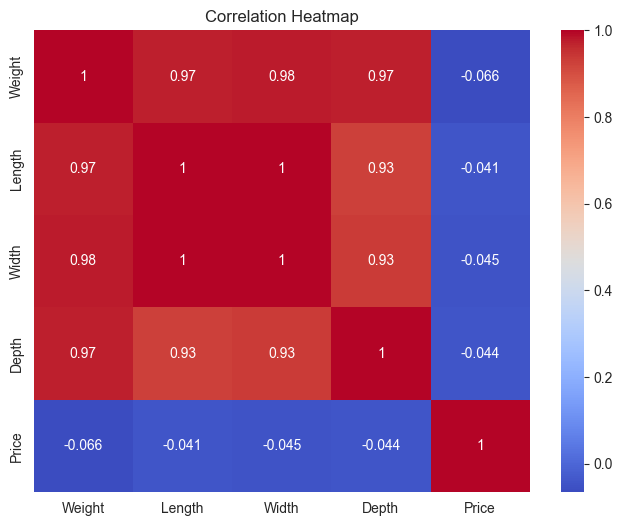

In [17]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### **Key Concepts**
#### Correlation Coefficient:
- ##### The correlation coefficient, denoted as (r), is a quantification of the linear relationship between two variables.
- ##### Its value ranges from -1 to 1:
    - ##### 1: Perfect positive correlation (as one variable increases, the other increases).
    - ##### -1: Perfect negative correlation (as one variable increases, the other decreases).
    - ##### 0: No linear correlation.

#### Heatmap:
- ##### A graphical representation of data where individual values are represented by color.
- ##### In this heat map:
    - ##### Lighter colours-according to white-reflect positive higher correlations, or closer to 1 
    - ##### In general the more darkly coloured represents a negative correlation, closer to -1
    - ##### Medium tones represent weak or no correlation. 

#### Diagonal:
- ##### Notice that the diagonal always has values of 1: it is the correlation between the variable and itself.



#### **Description of the Graph**
#### Variables:
- ##### Variables in question are: Weight, Length, Width, Depth and Price.

#### Observations:
- ##### There is a very strong positive association between Weight, Length, Width, and Depth. (Values of roughly 0.93–0.98.).

- ##### They would need to be physical sizes, which are scaling together obviously.

- ##### There is a weak or negligible correlation between Price and the other variables, with values of approximately -0.066 to -0.041.

- ##### This would suggest that the dimensions—Weight, Length, Width, Depth—bear little to no linear relationship with Price in this dataset.

#### Insights:

- ##### The strong correlations among the physical features suggest possible multicollinearity, which may affect models like linear regression if all features are used. 
- ##### The weak correlation with Price would suggest that Price may depend on other factors not captured in this dataset or have nonlinear relationships.

#### **Use of Correlation Heatmaps**
#### Feature Selection:
- ##### Variables that are poorly correlated with the target variable may be less useful predictors; for example, Price.
- ##### Highly correlated features result in redundancy and may thus be dropped for model simplicity.

#### Checking for Multicolinearity:
- ##### This strong correlation among different independent variables may raise an indication of multicolinearity problems that might be needed in predictive modeling.

#### **Overall Observation:**

1) ##### Price is not related with this numerical columns
2) #####  But most of the columns are related to each other like Height, Width, Length and Weight
___

#### **(Length, Depth, Width) VS Price**

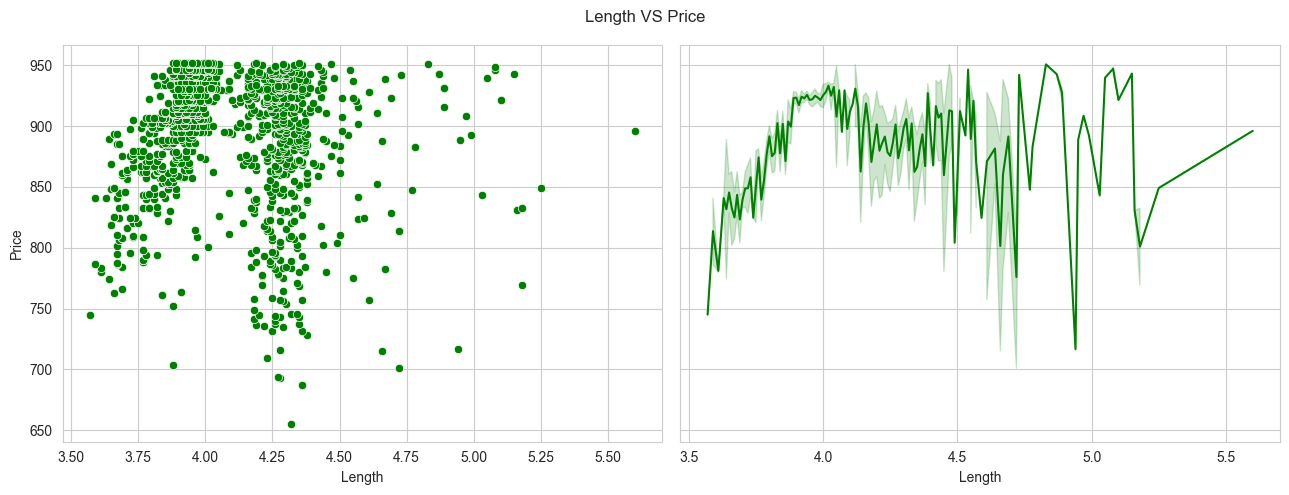

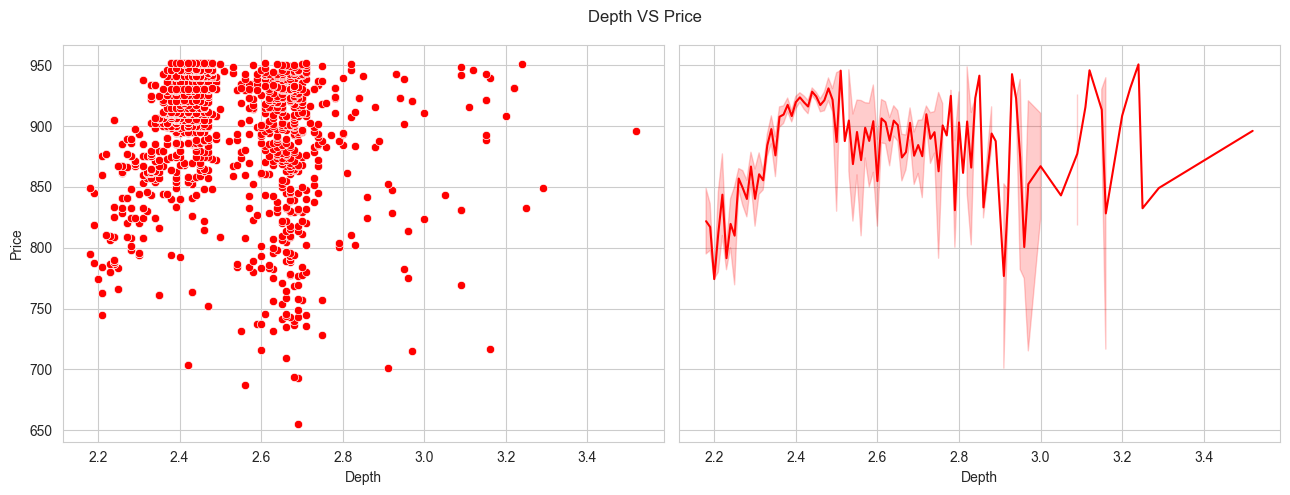

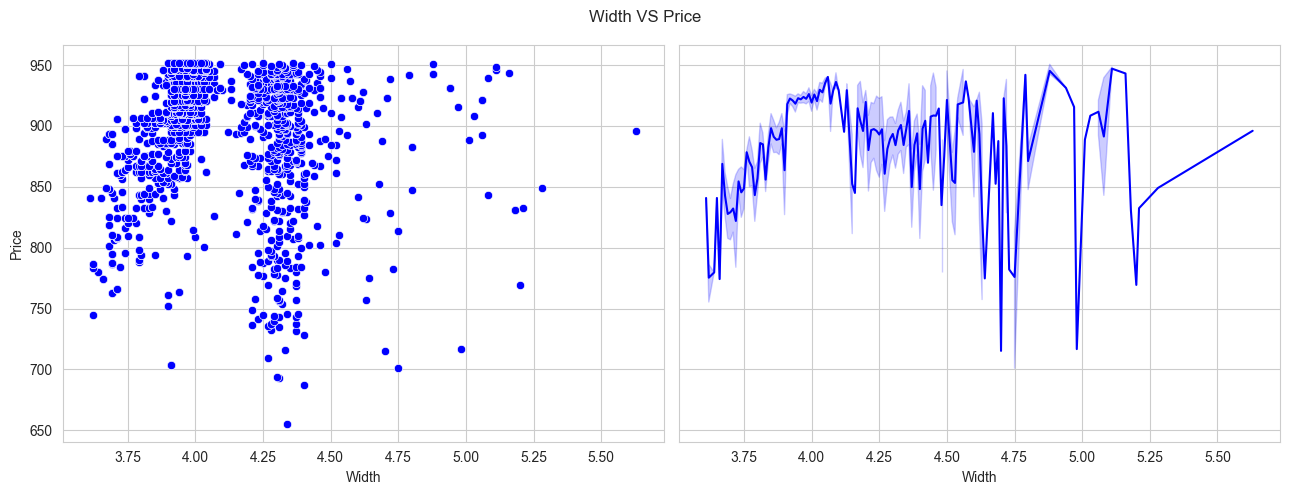

In [18]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Length'], y = data['Price'], ax = ax[0], color = 'green')

sns.lineplot(x = data['Length'], y = data['Price'], ax = ax[1], color = 'green')
ax[1].set_xticks([3.50,4.00,4.50,5.00,5.50])

fig.suptitle("Length VS Price")

plt.tight_layout()

fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Depth'], y = data['Price'], ax = ax[0], color = 'red')

sns.lineplot(x = data['Depth'], y = data['Price'], ax = ax[1], color = 'red')

fig.suptitle("Depth VS Price")

plt.tight_layout()

fig, ax  = plt.subplots(1, 2, figsize = (13,5), sharey=True)

sns.scatterplot(x = data['Width'], y = data['Price'], ax = ax[0], color = 'blue')

sns.lineplot(x = data['Width'], y = data['Price'], ax = ax[1], color = 'blue')

fig.suptitle("Width VS Price")

plt.tight_layout()

1. #### **Length vs. Price**
    - #### **Scatter Plot (Left):**
        - ##### Essentially, it is an relation variable plot between x-axis (Length) and y-axis (Price)
        - ##### Some bunching around particular values of Length (~4.0 to 4.5)
        - ##### There is no strong linear relation between the variables and the data points are scattered and connected loosely
    - #### **Line Plot (Right):**
        - ##### It gives the line plot the smoothed trend in Price as the Length increases.
        - ##### Observations:
            - ##### It starts to depict an increase in Price up to ~4.0, and after that, inconsistent prices.
            - ##### The larger the Length, the wider the width of the confidence interval. This shows a larger spread with fewer observations.

2. #### **Depth vs. Price**
    - #### Scatter Plot (Left):
        - ##### This is the relation of Depth versus Price, where the x-axis is Depth and the y-axis is Price.
        - ##### Points are clustered in certain ranges of Depth (~2.4 to 2.6) but otherwise scattered.
        - ##### The weak clustering may imply a negligible or non-linear relationship between Depth and Price.
    - #### **Line Plot (Right):**
        - ##### This shows the trend of Price across Depth.
        - ##### Observations:
            - ##### Price peaks around Depth ~2.5 and varies thereafter.
            - ##### Larger Depth values yield wider confidence intervals, indicating more variability and fewer data points.

3. #### **Width vs. Price**
    - #### Scatter Plot (Left):
        - ##### There is a relationship between Width (x-axis) and Price (y-axis).
        - ##### As in the case of Length and Depth scatter plots, there is a cluster around some particular Width values (~4.0 to 4.5).
        - ##### There is no strong linear trend that indicates weak correlation..
    - #### Line Plot (Right):
        - ##### The smoothed trend of Price for increasing Width is shown here.
        - ##### Observations:
            - ##### Price increases with Width but then starts to show erratic fluctuations beyond ~4.5.
            - ##### Larger Widths correspond to fewer data points and higher variability, hence wider confidence intervals.

#### **Concepts** 
#### **Scatter Plot:**
- ##### Has shown the raw distribution of data points to identify any relationship or trend.
- ##### The clustering in the scatter plots suggests most diamonds fall within a specific range of dimensions.

#### **Line Plot with Confidence Intervals:**
- ##### The smoothed lines are showing general trends in the data.
- ##### Shaded confidence intervals give the range of variability, or uncertainty, in the Price for given values of Length, Depth, or Width. Where the confidence interval is narrow, the trend is less variable; where the interval is wide, the trend is more variable.

#### **Key Observations:**
- ##### Relationships between Length, Depth, Width, and Price are weak or inconsistent, with considerable variability.
- ##### Physical dimensions may not be strong predictors of Price, as other factors such as Cut, Clarity, Color probably play a more important role.

#### **Insights** 
- ##### Weak Correlation: The physical dimensions, or Length, Depth, and Width, do not have as strong of an impact on Price in and of themselves.
- ##### Clustering: Most data falls within certain ranges of Length and Depth and Width, which likely relate to common sizes in the set.
- ##### Modeling Implications: The inclusion of other attributes such as Cut, Clarity, or Carat Weight increases the likelihood of a better prediction in Price.

#### **Overall Observation: Length vs Price**
1) ##### There is no Linear relationship between Length and Price as seen in Heatmap
2) ##### But we can see high decrease in price when Length between (4.75-5.00)
3) ##### Also Price is increasing after approx 5.25
4) ##### Highest Price is at Aprox 4.6-4.7
5) ##### There are Outliers too.

#### **Overall Observation: Depth vs Price**
1) ##### Same as Length there is no Linear relationship between Depth and Price
2) ##### But we also see high increase in Price after 3.3
3) ##### Highest Price is at approx 3.3-3.4
4) ##### There are Outliers too we will deal with them later

#### **Overall Observation: Width vs Price**
1) ##### Again there is no Linear relationship between Width and Price
2) ##### But we also see high increase in Price after 5.25 width
3) ##### Highest Price is at approx 4.8-4.85 and 5.1
4) ##### There are Outliers too we will deal with them later
_______________________________________________________________________________________________


#### **Weight VS Price (in Carat)**

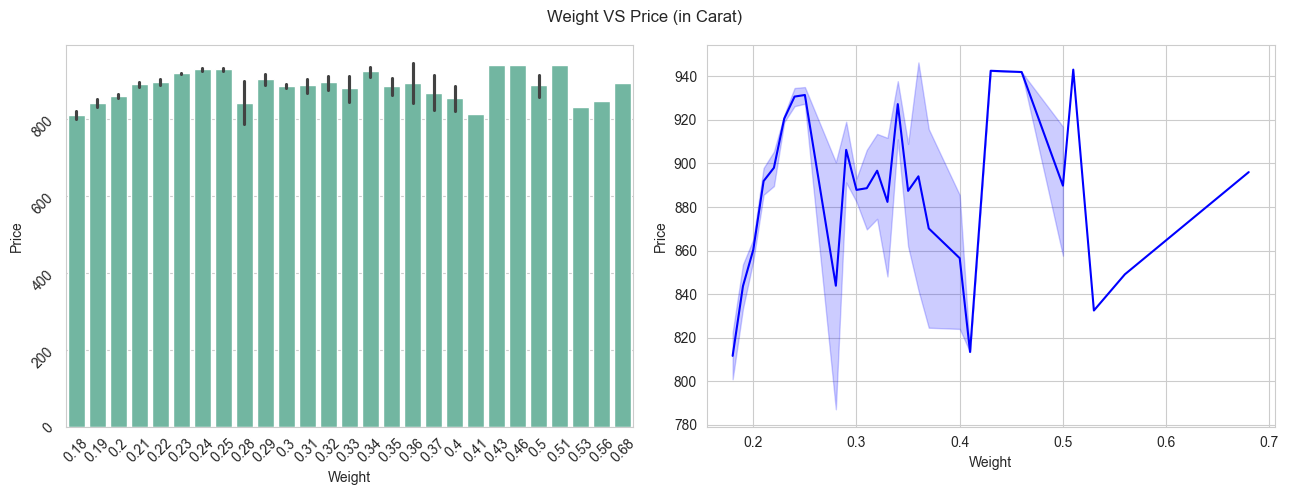

In [19]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))


sns.barplot(x = data['Weight'], y = data['Price'], ax = ax[0])
ax[0].tick_params(labelrotation = 45)

sns.lineplot(x = data['Weight'], y = data['Price'], ax = ax[1], color = 'blue')

fig.suptitle("Weight VS Price (in Carat)")

plt.tight_layout()

#### **Left Graph: Bar Plot**

1. #### Purpose:
    - ##### Here is the average Price for each discrete class of Weight.

2. #### Observations:
    - ##### This is a bar plot. The bars are colored with a mean Price for the given Weight, and error bars - likely standard deviation.
    - ##### There seems to be a general trend to this data: Price generally increase with Weight at the low weights.
    - ##### However, for larger weights over 0.3 carats, this trend stabilizes and variability increases.

3. #### Concepts:
    - ##### Bar plots are useful when comparing categorical or discrete numerical groups.
    - ##### Error bars give the spread or reliability of the mean values (the smaller the error bar, the less the variability).

#### **Right Graph: Line Plot with Confidence Interval**

1. #### Purpose:
    - ##### The purpose of this line plot is to emphasize how Price varies with an increase in Weight. Smoothing or interpolation connects data points.
    - ##### Variability or confidence intervals provide a region that most of the data should lie within.

2. #### Observations:

    - ##### There is a distinct upward trend in Price for low values of Weight, below 0.3 carats.
    - ##### For values greater than 0.3 carats, the upward trend becomes irregular, reflecting much more variation and discrepancies.
    - ##### The shaded area widens for higher weights, reflecting a greater uncertainty in Price for larger diamonds.

3. #### Concepts:

    - ##### Line plots are good to visualize the trend across continuous variables.
    - ##### Confidence intervals give an idea about the consistency of the data. Narrower intervals indicate that the data is more reliable; wider intervals indicate higher dispersion.

#### **Insights from the Graphs:**
1. #### General Trend:

    - ##### There exists a positive relationship between Weight and Price, proved by both graphs in particular for lower carat values below 0.3.
    - ##### For weights heavier than this, the strength of the relationship breaks, with Price being highly variable around an average value, reflecting Price may be determined by exogenous variables at higher weights.

2. #### Dispersion:

    - ##### Large error bars together with wide confidence intervals highlight that Price is really very variable, in particular at its higher categories of Weight.
    - ##### This may imply that the other features of the diamond such as clarity, color, cut, etc., given a constant Weight, drive the Price. 
    
3. #### Modeling Implications:
    - ##### Weight is a very strong predictor of Price for small diamonds but might require complementing with other features for large diamonds.

#### **Overall Observation:**
1) ##### Again there is no Linear relationship between Weight and Price
2) #####  But we also see high increase in Price after 0.55 weigth
3) ##### Highest Price is at approx 0.45 and 0.51-0.52
4) ##### There are Outliers too we will deal with them later
_______________________________________________________________________________________________

#### **Clarity Check:**

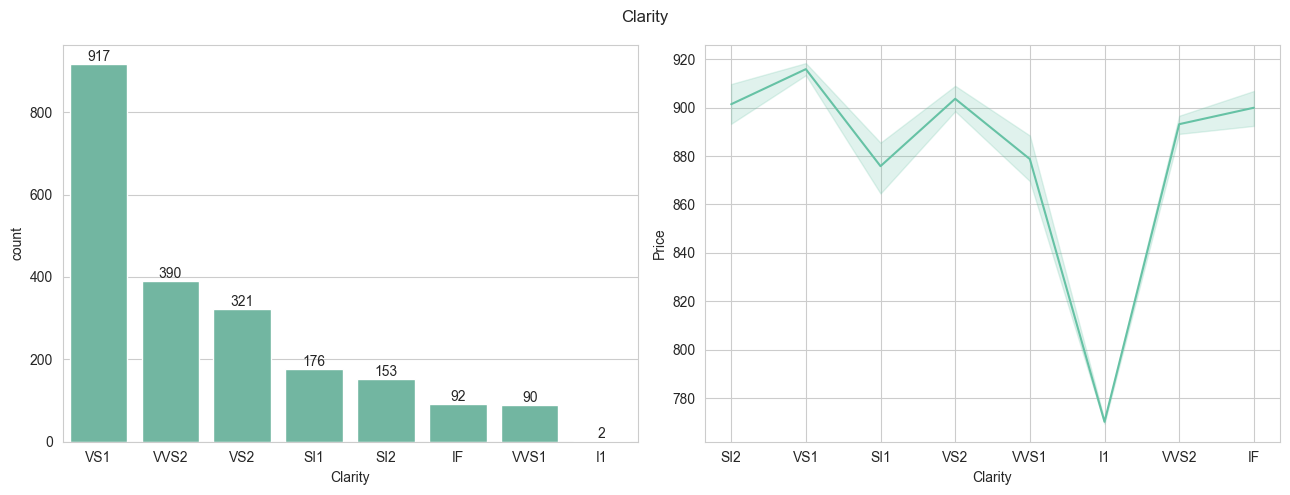

In [20]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Clarity'], order = data['Clarity'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Clarity'], y = data['Price'])

fig.suptitle("Clarity")

plt.tight_layout()

#### **Full Forms:**
- ##### IF – Internally Flawless
- ##### VVS1 – Very Very Small Inclusions 1
- ##### VVS2 – Very Very Small Inclusions 2
- ##### VS1 – Very Small Inclusions 1
- ##### VS2 – Very Small Inclusions 2
- ##### SI1 – Small Inclusions 1
- ##### SI2 – Small Inclusions 2
- ##### I1 – Inclusions 1

#### **Left Graph: Bar Plot**
1. #### Purpose:
    - ##### This is a bar plot that represents the distribution of counts of diamonds across the categories of Clarity.

2. #### Observations:
    - ##### The highest count for any category is with VS1 diamonds at 917, followed thereafter by VS2 with 390, and SI2 at 321.
    - ##### Other categories do not have very high counts, but I1 was particularly rare, having just two diamonds.
    - ##### The classes are not evenly distributed, with grades VS1 and VS2 being much higher in the represented datasets than other grades of clarity.

3. #### Concept:
    - ##### Bar graphs are good at comparing simple frequency counts for discrete categories. The distribution is unbalanced since some clarity grades such as VS1 and VS2 are more accessible or preferred than others.

#### **Right Graph: Line Plot with Confidence Interval**

1. #### Purpose:

    - ##### This line plot shows the mean Price for each category of Clarity. The light-shaded area shows the variability present in this case (standard deviation or confidence intervals).

2. #### Observations:

    - ##### Prices remain consistent for all clarity grades except for I1, where prices drop significantly. The confidence intervals are narrow among most grades, indicating stable price trends for diamonds in those categories. The highest prices are in the VS1 and IF categories, which indicates that those clarity grades are held in high esteem. 

3. #### Concepts:

    - ##### Line plots overlaid with confidence intervals depict trends while smoothing out data variability. The decline in Price of I1 reflects its lower quality or desirability compared to the other Clarity grades. 

#### **Insights from the Graphs:**
- #### Clarity Distribution:
    - ##### Most of the diamonds in the dataset are of VS1, VS2, and SI2 grades, which is indicative of these grades being manufactured or sold most.
    - ##### Other categories like I1 and IF might be the outliers or could be used in very special cases.

- #### Price Impact of Clarity:

    - ##### As the quality increases in Clarity-like VS1, IF-so do the prices.
    - ##### The fall for I1 stands for lower quality and market value.

- #### Data Imbalance:

    - ##### There is heavy bias in the dataset towards certain grades of Clarity. This could be handled by modeling or analyzing to avoid bias, such as resampling or weighting.

#### Overall Observation:
1) ##### More than Half of Diamonds are of Clarity "Very Small Inclusions 1" and also have highest price too
2) ##### Least one is "Inclusions 1" with only 2 Counts
3) ##### Price for most of the diamond are same apart from l1 but it only have 2 counts so not including that
4) ##### We will Combine the least ones to create a 'Other' as feature
_______________________________________

#### **Colour Grades**

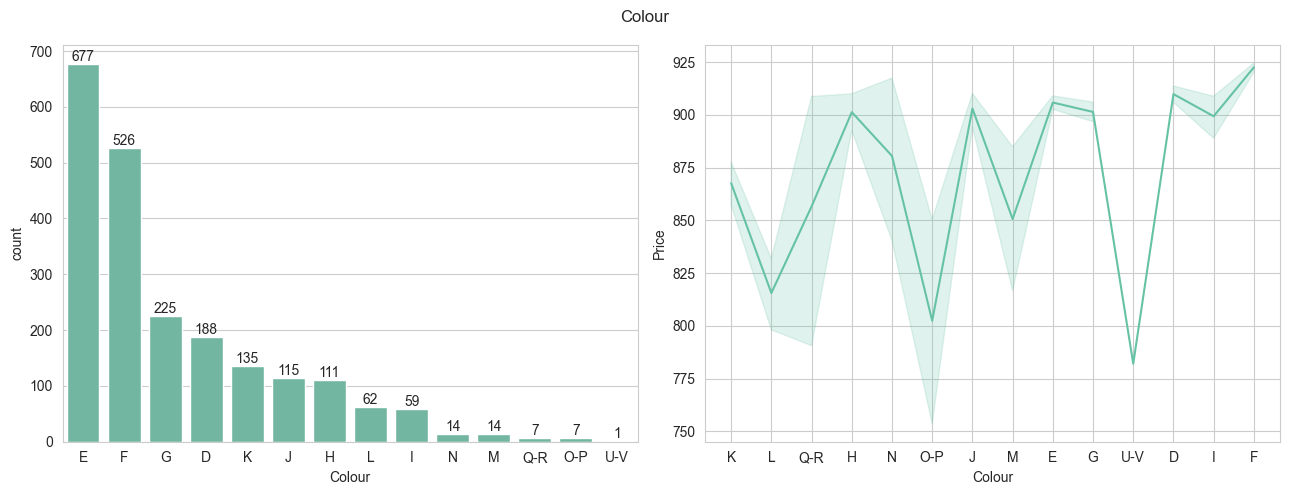

In [21]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Colour'], order = data['Colour'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Colour'], y = data['Price'], ax = ax[1])

fig.suptitle("Colour")

plt.tight_layout()

#### **Left Graph: Bar Plot**
- #### Purpose:
    - ##### Here's a bar plot of the frequency of the diamonds over Colour.

- #### Observations:
    - ##### E is the highest occurring Colour grade, as 677 diamonds have this grade, followed by F with 526 and G with 225.
    - ##### Less frequent grades are U-V, O-P, and Q-R, for which fewer than 10 diamonds exist.
    - ##### There is an imbalance in the Colour distribution. Some grades, such as E and F, dominate in the dataset.

- #### Concepts:
    - ##### Bar plots effectively show frequency or distribution for categorical variables. The skewed distribution suggests a tendency towards higher Colour grades in this dataset.

#### **Right Graph: Line Plot with Confidence Interval:**
- #### Purpose:
    - ##### This line plot is to display the Price mean for each Colour category, while the shaded region shows the variability, that can be standard deviation or confidence interval.

- #### Observations:
    - ##### Prices start showing an increasing trend for superior Colour grades like D, E, and F.
    - ##### While many grades, such as Q-R or O-P, have anomalous patterns and also are more variable, as would have been indicated by the wide confidence interval.
    - ##### F and D categories have relatively consistent and high Prices compared to the lowly graded K and L.
- #### Concepts:

    - ##### Line plots with confidence intervals display the trend and give an indication of the variability.
    - ##### Wide confidence intervals for the rarer Colour grades, such as U-V or Q-R, mean less reliance on the average value of Price because the sample size is smaller.

#### **Key Terms - Diamond Colour Grades:**

- ##### Diamonds range in grade from D, which is colourless, to Z, which is light yellow or brown:

    - ##### D-F: Colourless, most expensive
    - ##### G-J: Near Colourless, slightly less valuable
    - ##### K-Z: Noticeable Colour tint, less valuable

- ##### Colourless diamonds are normally the most sought after and pricey since they refract better light and brilliance.


#### **Insights from the Graphs**
- #### Colour Distribution:
    - ##### Most of the data consists of diamonds in category E, F, and G. This dataset is more about near-colorless diamonds.
    - ##### Colours of the higher grades, such as U-V or O-P, would be even less frequent due to lower demand.

- #### Impact on Price:

    - ##### A higher Colour grade-essentially D-F-translates to a premium Price, implying greater desirability/rarity.
    - ##### Lower grades-like K and L-will usually have relatively lower prices, as they are aesthetically not as pleasant. 

- #### Data Limitations:

    - ##### Categories with fewer data points, such as Q-R and U-V, have larger variability and their average Prices are less reliable.

#### **Overall Observation:**
1) ##### More than Half of Diamonds are of Colour "E" and "F"
2) ##### Least one are N, M, Q, R, O, P, U, V with only 2 Counts
3) ##### Price for most of the diamond are same but the data is not more for half of them so we cannot compare prices with them 
4) ##### Highest price is for F Color
4) ##### We will Combine the least ones to create a 'Other' as feature
_______________________________________

#### **Diamond Cuts**

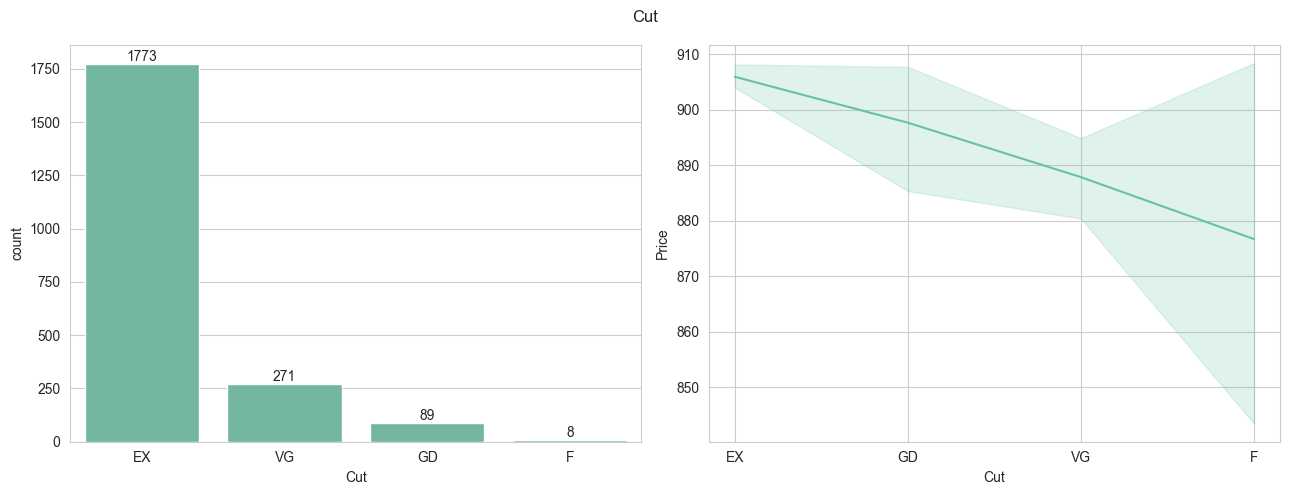

In [22]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Cut'], order = data['Cut'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Cut'], y = data['Price'], ax = ax[1])

fig.suptitle("Cut")

plt.tight_layout()

#### **Left Graph: Bar Plot**
##### The following bar plot tries to convey a sense to the reader about the number of diamonds falling under various Cut categories.

#### Observations:

- ##### The vast majority of the diamonds are classified as EX, totaling 1,773 diamonds.
- ##### The next most common category is VG, with 271 diamonds, followed by GD with 89, and lastly F, which is extremely rare, counts for only 8.
- ##### The dataset is highly one-sided towards diamonds with an Excellent Cut, suggesting some kind of preference or bias in availability.

#### Concepts:

- #### Bar plots are useful for showing frequencies or distribution of categorical variables. Imbalance in Cut categories signifies that most diamonds are rated as Excellent; this may be a reflection of market trends or dataset sampling.

#### **Right Graph: Line Plot with Confidence Interval**
#### Purpose:
- ##### This above line plot depicts the average Price for each category of Cut, and the gray area shows the variability - perhaps standard deviation or confidence intervals.

#### Observations:
- ##### Among the categories of Cut, the Excellent quality diamonds have the highest average Price, approximately 910, but the variability is very small. 
- ##### The prices for the diamonds with Good and Very Good Cuts are lower, with a slight decreasing trend as the quality of Cut decreases.
- ##### The Fair (F) category, with the fewest number of data points, has the lowest Price and a very wide confidence interval, indicating that the trend is less reliable.

#### Concepts:

- ##### Line plots with confidence intervals emphasize trends while showing the variability in the data.
- ##### The decreasing Price as Cut quality decreases indicates that Cut is an important factor in determining the value of a diamond.

#### **Key Terms Concerning Diamond Cut**
#### Cut Quality:
- ##### Refers to the degree to which a diamond's facets are proportioned to allow maximum brilliance and fire.
- ##### The individual grades are: Excellent (EX), Very Good (VG), Good (GD), and Fair (F).

##### Price Impact: 
- ##### The cut is usually the most important of all the factors that go into valuing a diamond, often more than the carat weight or clarity.
- ##### Diamonds with better Cuts are more brilliant and appealing, commanding higher Prices.

#### **Insights from the Graphs** 
#### Cut Distribution:
- ##### Most of the dataset is concentrated around the Excellent Cut grade of diamonds, which is desirable and probably will have better-selling Prices.
- ##### The low occurrence of Fair and Good grades could indicate lower market demand for those classes or less frequency of production.

#### Price Trend:
- ##### There is a proper relation between the Cut quality and Price: while quality improves, Prices tend to go up.
- ##### The dramatic decrease in Price for the lower qualities Cut, such as Fair, illustrates quite well the importance of Cut in the valuation of a diamond.

#### Data Imbalance:
- ##### The few samples for categories like Fair (F) create some uncertainty in the Price trends for those grades, as suggested by the wide confidence intervals.

#### **Overall Observation:**
1) ##### More than Half of Diamonds are of Cut "Excellent"
2) ##### Least one is F with 8 counts
3) ##### Price decreases with the Cut it makes sense as Excellent cut diamonds have more price than the other ones
4) ##### Highest price is for EX Cut diamonds
5) ##### We will Combine the least ones to create a 'Other' as feature
_______________________________________

#### **Diamond Polish**

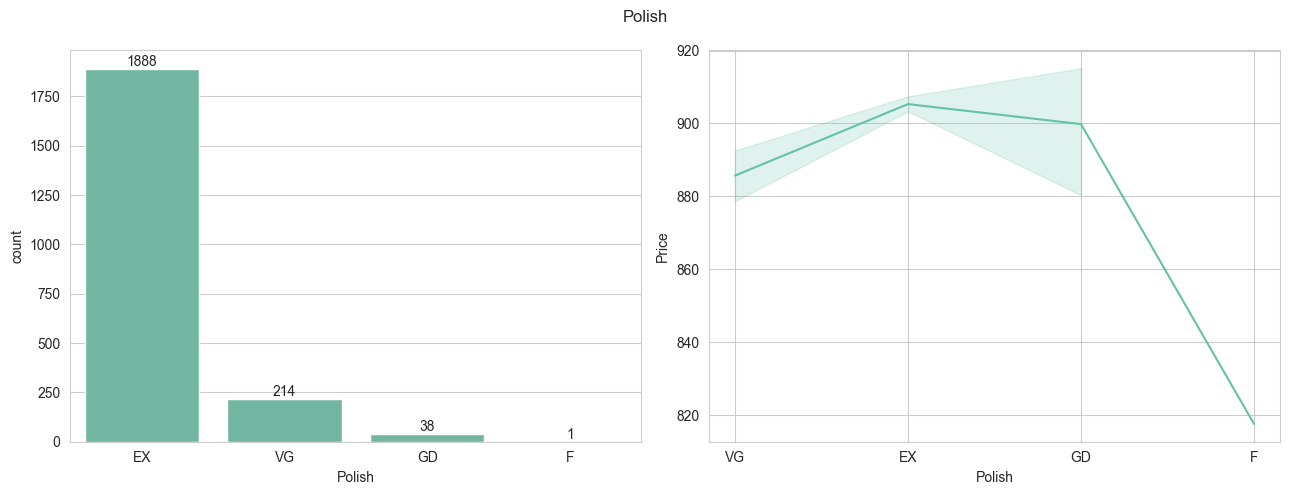

In [23]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Polish'], order = data['Polish'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Polish'], y = data['Price'], ax = ax[1])

fig.suptitle("Polish")

plt.tight_layout()

#### **Left Graph: Bar Plot**
- #### Purpose:
    - ##### This bar plot depicts the distribution of the diamonds across various categories of Polish.

- #### Observations:
    - ##### EX or Excellent is, by far and away, the most frequent Polish grade, having 1,888 diamonds in total.
    - ##### VG or Very Good has 214, GD or Good has 38, and F or Fair being very rare, totals only 1 diamond.
    - ##### This data is skewed to diamonds with an Excellent grade of Polish, thus indicating some form of preference or availability bias.

- #### Concepts:

    - ##### Bar plots are effective in showing the frequency or distribution of categorical variables. 
    - ##### The strong right-skew towards Excellent Polish indicates that most diamonds are well polished, which is an expected reflection of market expectations.

#### **Right Graph: Line Plot with Confidence Interval**
- #### Purpose:
    - ##### This is a line plot of mean Price for each Polish category. There is a shaded area around the mean depicting dispersion - maybe standard deviation or confidence intervals.

- #### Observations:

    - ##### Diamonds rated Excellent (EX) Polish have the highest average Price (~910), with relatively small variability.
    - ##### Diamonds rated Very Good (VG) have slightly lower Prices but still follow a fairly consistent trend.
    - ##### There is a sharp decline in Price for the Good (GD) and Fair (F) categories, although these grades have fewer data points, as indicated by the wide confidence intervals.
    - ##### The trend for Fair (F) is unreliable due to only one data point.

- #### Concepts:

    - ##### Line plots with confidence intervals show the trend and include the variability in the data.
    - ##### The decreasing Price trend with reduced Polish quality indicates that Polish quality is an important determinant of the value of a diamond.

#### **Key Terms: Diamond Polish**
- ##### Polish refers to the smoothness and quality of a diamond's surface, which affects the appearance of the stone in terms of light that enters it. 
- ##### It is graded as follows: Excellent (EX), Very Good (VG), Good (GD), Fair (F).

- ##### Price Impact:
    - ##### The higher the polish grade, the more brilliant the diamond appears, and, therefore, the more it is worth.

#### **Insights from the Graphs: Polish Distribution**

- ##### Most of the diamonds in the dataset are of Excellent polish grade, and that is expected in any high-quality diamond.
- ##### Lower Polish grades, such as Good and Fair, are rare, probably due to low demand or limited production.

- #### Price Trend:

    - ##### There is a clear relationship between Polish grade and Price: better Polish grades correspond to higher Prices.
    - ##### Grades such as Good and Fair show significantly lower Prices; however, the data can be less reliable for such grades because of smaller sample sizes.
- #### Data Imbalance:
    - ##### A very small sample size in certain categories, such as those like Fair (F), does introduce a little uncertainty in the trend for such grades.

#### **Overall Observation:**
1) ##### More than Half of Diamonds are of "Excellent" Polish
2) ##### Least one is F with just 1 count
3) ##### Price decreases with the Polish it makes sense as Excellent Polished diamonds have more price than the other ones
4) ##### Highest price is for EX Polish diamonds
5) ##### We will Combine the least ones to create a 'Other' as feature
_______________________________________

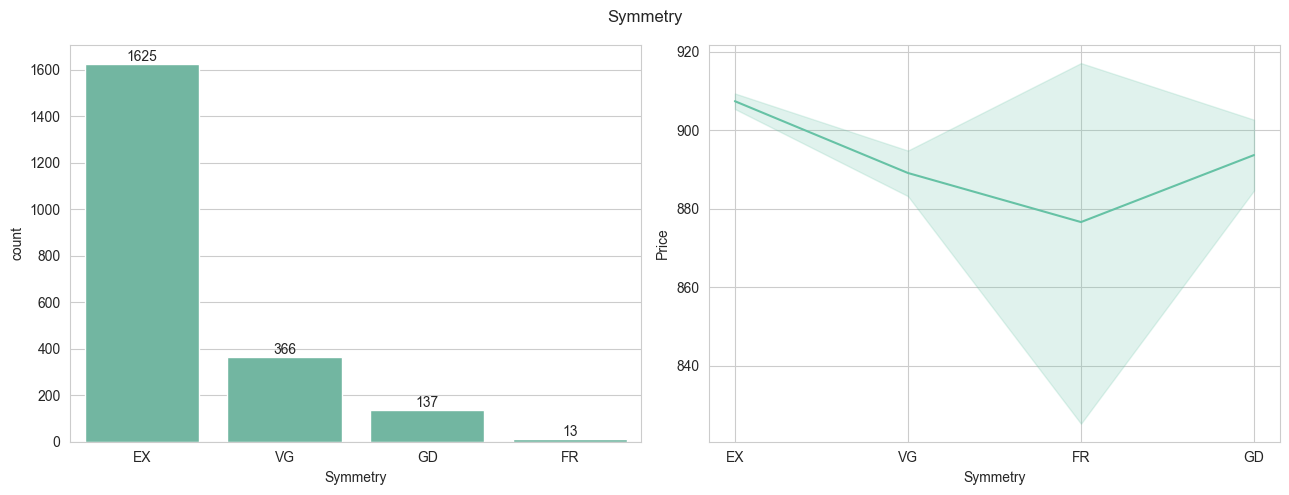

In [24]:
fig, ax  = plt.subplots(1, 2, figsize = (13,5))

sns.countplot(x = data['Symmetry'], order = data['Symmetry'].value_counts().index, ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = data['Symmetry'], y = data['Price'], ax = ax[1])

fig.suptitle("Symmetry")

plt.tight_layout()

#### **Left Graph: Bar Plot**
- #### Purpose:
    - ##### This is the bar plot of number of different types of diamond Symmetry.

- #### Observations:

    - ##### Most of the diamonds have symmetry of EX, which is 1,625 in total number.
    - ##### The second highest symmetry category is VG, which is 366 in total number.
    - ##### A total of 137 diamonds are of Good, and Fair symmetry is really rare, totaling only 13.
    - ##### Skewed towards Excellent: the data reflects that most the diamonds have high-quality Symmetry.

- #### Concepts:

    - ##### Bar plots effectively show the frequency distribution of categorical variables.
    - ##### This strong skew towards higher symmetry grades suggests that most of the diamonds are designed and manufactured to meet high standards of symmetry.

#### **Right Graph: Line Plot with Confidence Interval**
- #### Purpose: 
    - ##### Given the average Price by each category in Symmetry, a line plot with a shaded area, for example, of either standard deviation or confidence intervals:.

- #### Observations:

    - ##### The highest average Price is around 910 for Diamonds with Excellent (EX) symmetry.
    - ##### The diamond having Very Good (VG) symmetry tends to decline in Price.
    - ##### Fair (FR)-symmetry has a large drop in Price, but the width of its confidence interval is huge due to the small sample size of 13 diamonds. 
    - ##### The Price for GD symmetry is coming back a bit but is still far below the price for Excellent symmetry. 

- #### Concepts: 
    - ##### Line plots with confidence intervals identify general trends but also give a sense of the variability within the data.
    - ##### Wide CIs for small categories, like Fair symmetry, are indicative of the lesser reliability in observed trends.

#### **Key Terms about Diamond Symmetry**

- ##### Symmetry is the precision of alignment and balance of facets in a diamond.

- ##### Symmetry is one of the factors affecting the way light reflects through it, hence the brilliance and sparkle.

- ##### Symmetry Grades:

    - ##### EX (Excellent): Alignment of facets is virtually perfect.
    - ##### VG: Deviations are platonic and nearly imperceptible.
    - ##### GD (Good): Quite impressive as asymmetry is found, but still tolerable.
    - ##### FR (Fair): The asymmetry itself is pronounced, thus affecting the luster and beauty as a whole.

#### **Insights from the Graphs:**
- #### Distribution of Symmetry

    - ##### Most of the diamonds are placed in the Excellent and Very Good categories regarding dimensions pertaining to symmetry, which may then count as an index of their high desirability and demand in the market.
    - ##### Diamonds with Fair Symmetry are very rare, probably because of low demand or unappealing appearance.

- #### Price Trend:

    - ##### Symmetry indeed affects Price, with higher grades of symmetry commanding a premium in price.
    - ##### The major fall of Price for Fair Symmetry indicates that the market demands a better grade of symmetry.
- #### Data Imbalance:

    - ##### The small sample size for categories like Fair symmetry introduces variability and uncertainty in their Price trends..

#### **Overall Observation:**
1) ##### More than Half of Diamonds are of "Excellent" Symmetry
2) ##### Least one is FR with just 13 counts
3) ##### Price decreases with the Symmetry it makes sense as Excellent Symmetry diamonds have more price than the other ones
4) ##### Highest price is for EX Symmetry diamonds
5) ##### We will Combine the least ones to create a 'Other' as feature
_______________________________________

#### Combining the features with minimum count as 'Other' in this columns <br>
1) Colour<br>
2) Clarity<br>
3) Cut <br>
4) Polish <br>
5) Symmetry

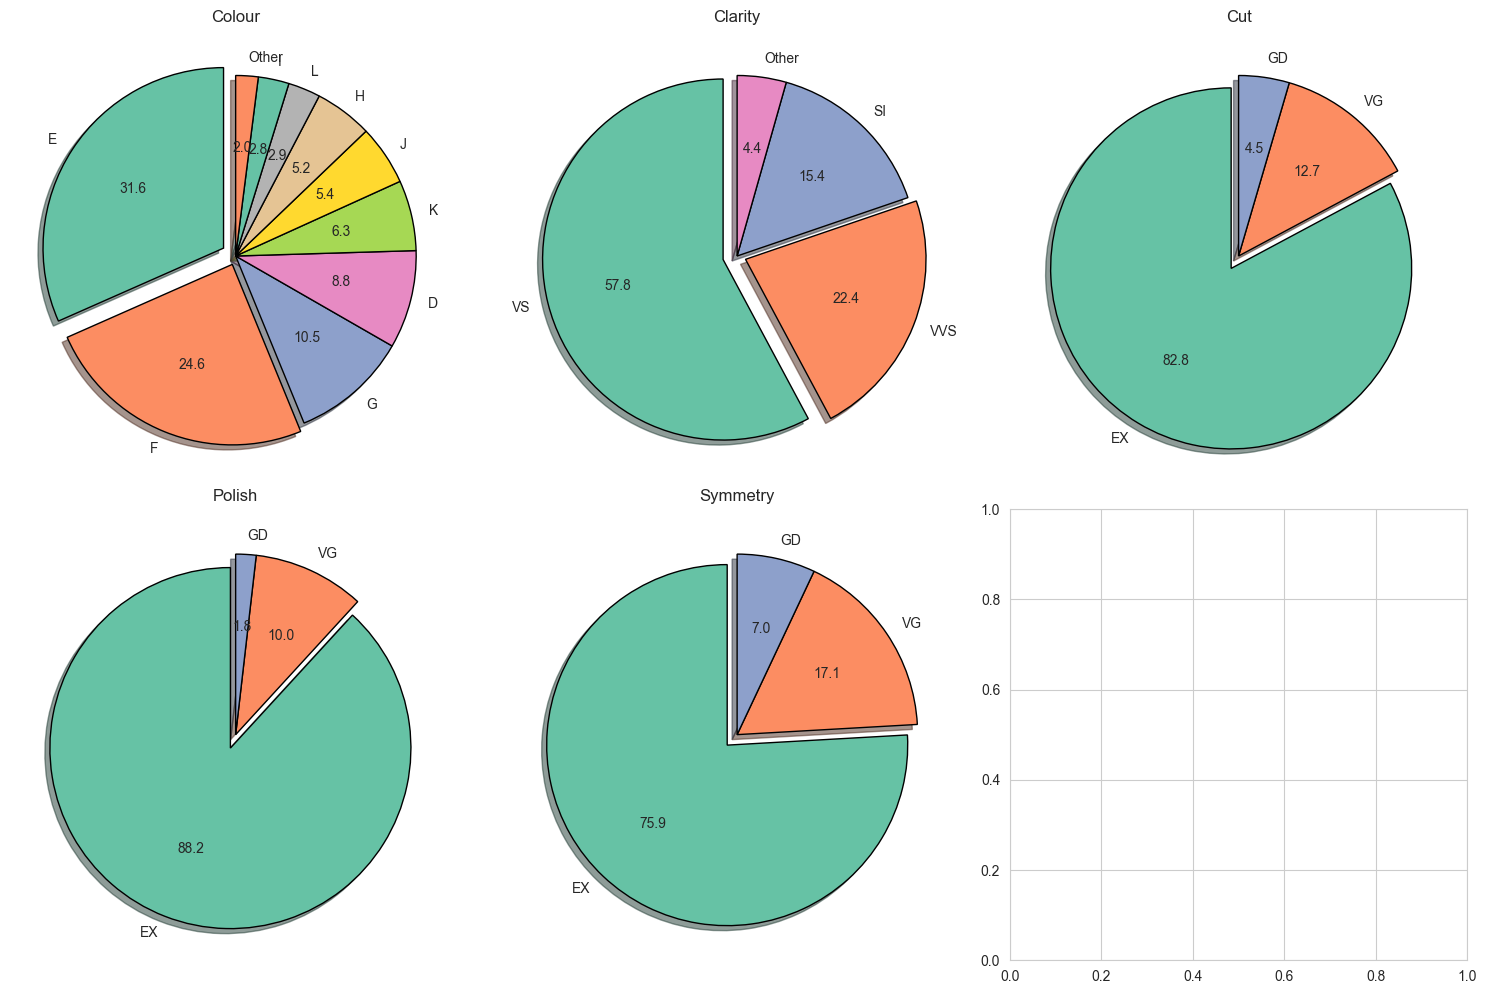

In [25]:
#Colour
data['Colour'] = np.where(np.logical_or(data['Colour']=='N',data['Colour']=='M'), 'Other', data['Colour'])
data['Colour'] = np.where(np.logical_or(data['Colour']=='O-P',data['Colour']=='U-V'), 'Other', data['Colour'])
data['Colour'] = np.where(data['Colour'] == 'Q-R', 'Other', data['Colour'])

#Clarity
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='VVS1',data['Clarity']=='VVS2'), 'VVS', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='SI1',data['Clarity']=='SI2'), 'SI', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='VS1',data['Clarity']=='VS2'), 'VS', data['Clarity'])
data['Clarity'] = np.where(np.logical_or(data['Clarity']=='IF',data['Clarity']=='I1'), 'Other', data['Clarity'])

#Cut (Only 8 counts of F so replacing Fair with Very Good)
data['Cut'] = np.where(data['Cut'] == 'F', 'GD', data['Cut'])

#Polish (Only 1 counts of F so replacing Fair with Very Good)
data['Polish'] = np.where(data['Polish'] == 'F', 'GD', data['Polish'])

#Symmetry (Only 13 counts of F so replacing Fair with Very Good)
data['Symmetry'] = np.where(data['Symmetry'] == 'FR', 'GD', data['Symmetry'])


# Graph code starts here
labels = []
for i in ['Colour', 'Clarity', 'Cut', 'Polish', 'Symmetry']:
    labels.append(list(data[i].value_counts().index))

fig, ax = plt.subplots(2, 3, figsize = (15,10))
ax[0][0].pie(data['Colour'].value_counts()[:], labels = labels[0],explode = [0.08,0.05,0,0,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][0].set_title("Colour")

ax[0][1].pie(data['Clarity'].value_counts()[:], labels = labels[1],explode = [0.08,0.05,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][1].set_title("Clarity")

ax[0][2].pie(data['Cut'].value_counts()[:], labels = labels[2],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[0][2].set_title("Cut")

ax[1][0].pie(data['Polish'].value_counts()[:], labels = labels[3],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[1][0].set_title("Polish")

ax[1][1].pie(data['Symmetry'].value_counts()[:], labels = labels[4],explode = [0.08,0,0],wedgeprops={'edgecolor':'black'}, shadow= True, startangle=90, autopct='%1.1f')
ax[1][1].set_title("Symmetry")

plt.tight_layout()

1. #### **Colour**
- ##### Categories include E, F, G, D, K, J, H, L, and "Other."
- ##### Observations:
    - ##### Colour distribution is dominated by E 31.6% and F 24.6%.
    - ##### Other Colours such as K, J, H, L make up a proportionately very much smaller number.
    - ##### Suggests preference or availability of near-colourless diamonds (E, F) in data set.

- ##### Concepts:
    - ##### Diamonds are graded on their colorlessness D = colorless to Z = noticeable tint.
    - ##### Higher proportions of E and F reflect market demand for minimal colour in diamonds.


2. #### **Clarity**
- ##### The categories are VS (Very Small Inclusions), VVS (Very Very Small Inclusions), SI (Small Inclusions), and "Other. "
- ##### Observations:
    - ##### The diamonds' prevalence mainly features in VS 57.8%. Then comes VVS in 22.4%, and SI is 15.4%.
    - ##### Other Clarity grades are scarce (4.4%).
- ##### Concepts:
    - ##### Clarity is internal inclusions (defects ).
    - ##### The VS and VVS diamonds are the preferred choice, reflecting better look and, thus, better value.


3. #### **Cut**
- ##### Grades: EX (Excellent), VG (Very Good), GD (Good).
- ##### Observations:
    - ##### EX (Excellent) makes up 82.8% of the data.
    - ##### VG (12.7%) and GD (4.5%) follow from far away, with small shares.
- ##### Concepts: 
    - ##### Cut quality affects the performance of light, brilliance, and sparkle. 
    - ##### The high percentage of Excellent cuts attests to the demand for top-quality diamonds.

4. #### **Polish**
- ##### EX, Excellent; VG, Very Good; GD, Good.
- ##### Observations:
    - ##### EX (Excellent) is the dominant grade with 88.2%, followed by VG (10.0%) and a very small proportion of GD (1.8%).
- ##### Concepts:
    - ##### Polish is measures of surface smoothness, which reflects light.
    - ##### Its overwhelming preference for Excellent Polish attests to its importance in diamond quality.

5. #### **Symmetry**
- ##### Categories: EX (Excellent), VG (Very Good), GD (Good).
- ##### Observations:
    - ##### EX (Excellent) for 75.9% followed by VG (17.1%) and 7.0% is GD.
- ##### Concepts:
    - ##### Symmetry affects the precision of facet alignment, and therefore brilliance. 
    - ##### The high percentage of Excellent symmetry reflects the market demand for well-proportioned diamonds.

#### **General Comments**
- ##### Market Trends:
    - ##### Most diamonds in the dataset are of high quality, with Excellent being the dominant grade in categories like Cut, Polish, and Symmetry.
    - ##### Color and Clarity also come into play for better grades (E, F for Color; VS, VVS for Clarity).

- ##### Distribution Imbalance :
    - ##### The dataset is skewed toward high grades, which could reflect market availability or sampling bias.

- ##### Consumer Preferences: 
    - ##### Low- buyers won't compromise on anything else but high-quality attributes - excellent grades and near colorless Colors is what justifies the added price.

#### Dealing with Outliers

In [26]:
numerical_columns = ['Weight', 'Length', 'Width', 'Depth']
categorical_columns = [i for i in data.columns if i not in numerical_columns if i not in ['Id', 'Price']]

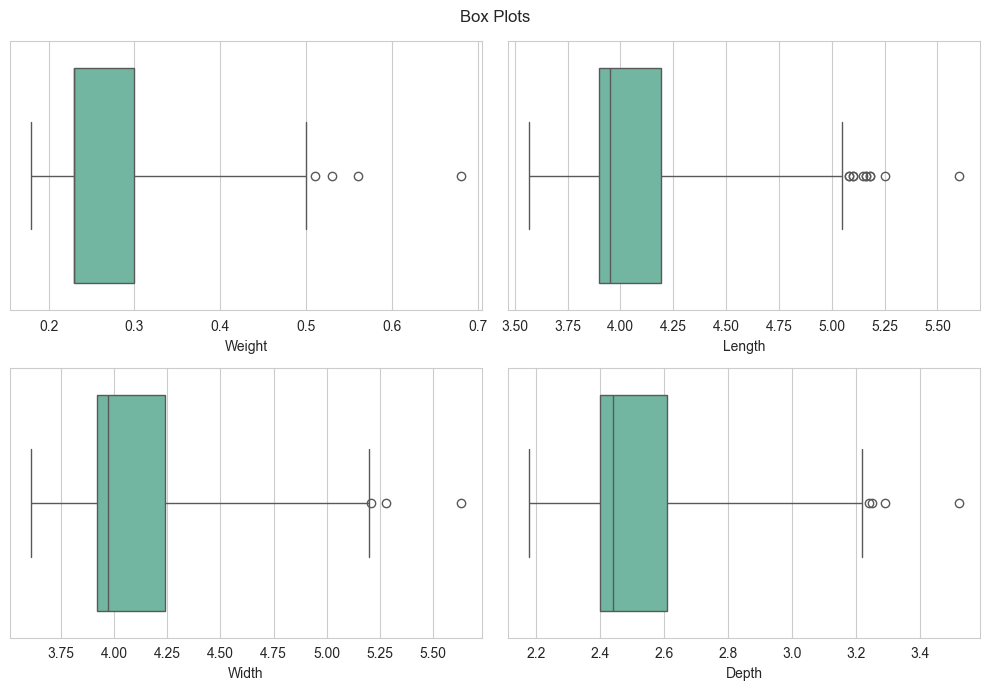

In [27]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = data[numerical_columns[count]], ax = ax[i][j], whis=3)
        count += 1

fig.suptitle("Box Plots")
plt.tight_layout()

#### **Elements of a Box Plot**
1. #### Box:
    - ##### This corresponds to the interquartile range, known as IQR, where the middle fifty percent of the data resides.
    - ##### This also means that the quarter marks of the definiing boundaries of the data set are Q1 that is the lower boundary and Q3 the, upper cut off. 
    - ##### The median value or the 50th percentage is represented by a line through the box.

2. #### Whiskers:
    - ##### Extending from Q1, the whisker reaches as far as the lowest value for which the upper Whisker extends from Q3.
    - ##### Any data outside the Whiskers is considered to be an outlier.

3. #### Outliers:
    - ##### As for outliers, These are represented by individual small dots placed away from the whiskers, which are single points that reside on the tails of the distribution.

#### **Individual Box Plots**
1. #### Weight
    - ##### Observations:
        - ##### The median_weight of weight appears to be hovering around 0.3 carats.
        - ##### We see the IQR lying somewhere between 0.25 to 0.35 carats.
        - ##### Lagging points are emerging where weight is more than 0.5 suggesting that there are a few abnormally larger diamonds in the sample data.

    - ##### Insights:
        - ##### Diamond weights are small more often than not and have a strong centralization distribution under 0.5 carats.

2. #### Length
    - ##### Observations:
        - ##### The median length comes around just above four, which is 4.0 units.
        - ##### The IQR, too, appears to sit at 3.75 and 4.25.
        - ##### An estimated unit above 4.75, several points are noted to be in the gap of 5.0.

    - ##### Insights:
        - ##### Length ranges 4 through 4.75 units, most values do seem to be meeting at the cluster of 4.3.

3. #### Width
    - ##### Observations:
        - ##### The median width was again around 4.0 boots, as we noticed with length.
        - ##### We note the IQR from 3.75 to 4.25, giving us a fair I-telling unit distributions graph.
        - ##### There are some ‘gaps’ for width values beyond estimated 4.75 units at some having reached five.

    - ##### Insights:
        - ##### The depth width of span appears where outliers raise the odd length for some diamonds.

4. #### Depth
    - ##### Observations:
        - ##### The median depth comes out to be about two and half units, or close.
        - ##### The interquartile graph is constructed from the IQR which is estimated between 2.4 and 2.6 units and is noted to be the most stable among the rest all four measures.
        - ##### Regarding outward points, an estimated figure of above 3.0 indicates the presence of some extreme instances , with a handful of cases requiring 3.4 or more.

    - ##### Insights:
        - ##### While depth remains the least variable dimension, a few outliers suggest otherwise.


#### **Concepts and Insights**
- #### Distribution:
    - ##### For all four attributes, the data are tightly concentrated inside of the IQR—therefore, the process or selection criteria for such diamonds are relatively stable in their manufacturing.
    
- #### Outliers:
    - ##### All the attributes have outliers beyond the whiskers, which would suggest that this is a rare or uncommon diamond that does not necessarily follow typical proportions.
    
- #### Symmetry:
    - ##### Most of the distributions look symmetric with medians centered in the boxes. However, the presence of outliers slightly skews the interpretation.

- #### Variability: 
    - ##### Depth has the lowest IQR, showing the least amount of variability. Weight has the most extreme outlier. Possibly, diamond size varies more erratically than other dimensions.

#### **Removing Outliers using Z-Score**

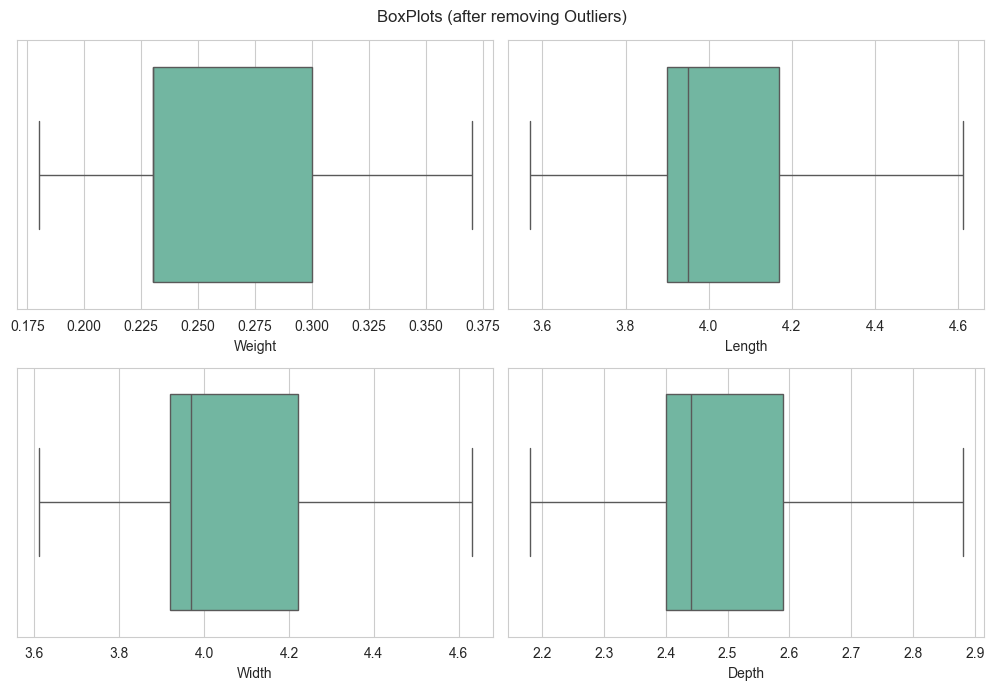

In [28]:
threshold = 3

z_scores = zscore(data[numerical_columns])

outliers = (z_scores>threshold).any(axis = 1)

data = data[~outliers]

fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(x = data[numerical_columns[count]], ax = ax[i][j], whis=3)
        count += 1

fig.suptitle("BoxPlots (after removing Outliers)")
plt.tight_layout()

#### **Box Plot Structures**
1. #### Box:
    - ##### The box indicates the interquartile range (IQR) and the box contains 50% of the data in the middle; that is from the 25th percentile to the 75th percentile.
    - ##### It marks the feature that aggregates the points of the data.

2. #### Line inside the box:
    - ##### Displays the median which is the data center (50th percentile).

3. #### Whiskers:
    - ##### Whiskers of the plot extend to least and the most data points but not greater than 1.5 times the IQR.

4. #### No Outliers:
    - ##### In presence of outliers, indicated by the whisker ends, the narrowing of rows witnessed come to a halt in this case.

#### **Observations for Each Attribute**
1. #### Weight
    - #### Range:
        - ##### The weight values lie in the range ~0.175 and ~0.375 carats.
        - ##### Proves to be quite effective since the average weight or median stands at approximately 0.275 carats.
        - ##### The IQR consists of most values of the middle 50% (which is the IQR) between 0.25 and 0.3 carats.

    - #### Insights:
        - ##### Once outliers are eradicated, the picture turns clearer as we focus on the more suitable range of the average value while removing extremes such as diamonds exceeding 0.5 carats or more.

2. #### Length
    - #### Range:

        - ##### The range of Length values are between 3.6 and 4.6 units.

        - ##### The median unit stands at 4 while the IQR ranges from 3.9-4.2.

    - #### Insights:

        - ##### Data is relatively concentrated together on the median which in this case suggests that Length remains consistent for the majority after removing extreme points of reference (or length) for long diamonds.

3. #### Width
    - #### Range:
        - ##### Width varies between 3.6 and 4.6 units.
        - ##### The median is at approximately 4.0 units, and IQR is from 3.9 to 4.2 units.
    - #### Insights:
        - ##### Width distribution is very close to Length, which shows proportionality between these two dimensions.

4. #### Depth

    - #### Scope:
        - ##### Minimum and maximum depth units fluctuates between values of 2.2 and 2.9.
        - ##### The median approximates to 2.5 units while the IQR extends from 2.4 to 2.6 units.

    - #### Analysis:
        - ##### Out of all calculated parameters, depth has the least range and the least variability which speaks in favoring if uniformity in this dimension.

#### **Recommendations and Conclusions Following Outlier Elimination**
- #### Influence of Outlier Deletion:
    - ##### In general, removing outliers gives a better representation of the average and variability of the dataset particular measure than when they are not removed.
    - ##### The mean in most cases is affected by the outliers and in some cases hinders the visibility of patterns, but in this case it is avoided.

- #### About the Effects of Interval Scaling in Data:
    - ##### The medians are located inside the boxes which demonstrate the central tendency meaning all distributions for these four features has been symmetrical.

- #### Sustainability or Robustness of Positioning Characteristics:
    - ##### The attributes are narrowly clustered or tightly grouped around the mean which is evidenced by the low values of the IQR, which suggests uniformity in the dimensions of the diamonds in the sample.

- #### Relationship Between Characteristics:
    - ##### There is a suggestion of proportionality between Length and Width because their distributions are quite similar.


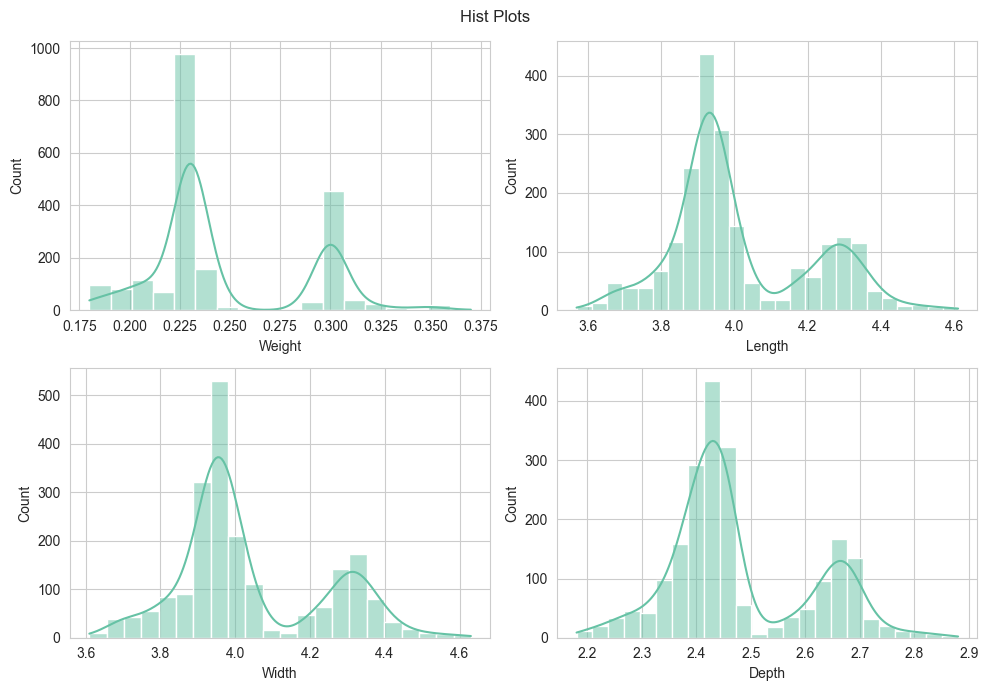

In [29]:
fig, ax = plt.subplots(2,2, figsize = (10,7))
count = 0
for i in range(2):
    for j in range(2):
        sns.histplot(x = data[numerical_columns[count]], ax = ax[i][j], kde=True)
        count += 1

fig.suptitle("Hist Plots")
plt.tight_layout()

#### **Components of the Histograms** 
- #### Bars:
    - ##### Represents frequency-count of observations lying within any continuous range of the variable.
    - ##### The height of each bar reflects the number of data falling in the range of that bin. 

- #### Density Curve:
    - ##### A smooth line drawn on the histogram to approximate the probability density function.
    - ##### It helps to visually see the overall pattern of distribution irrespective of the choice of bin size.

#### **General Insights**

- #### Bimodal Distributions:
    - ##### Both Weight and Depth have clear indications of being bimodally distributed, hinting at two dominant groups or standards in the size of diamonds.

- #### Symmetry and Skewness:
    - ##### Length and width are a little right-skewed, with most values clustered near the mean, with fewer observations at higher ranges.
    - ##### This could indicate that consumers prefer diamonds in certain proportions.

- #### Density Curves:

    - ##### Density curves give the smoothed version of the distribution for the given data and will facilitate patterns in the data not easy to realize directly from bars on a histogram. Proportionality:

    - ##### This closeness of distribution of Length and Width comes because these dimensions in diamonds are generally correlated in proportional designs.

#### **Overall Observation:**
1) ##### Skewness for all of them are between 0.5-0.6 it seems good with this dataset

##### The distribution patterns of the dimensions of the diamond are shown by the histograms and density curves. The bimodal distributions in Weight and Depth indicate clear-cut groups, while the slight skewness in Length and Width indicates that there is some variation in the proportions. This could help in identifying standardization trends and cleaning the data further for analysis.

_______________________________________

#### **Coverting Categorical Columns to Numerical Columns**

#### Concepts
##### Categorical Data:

- ##### Categorical columns contain discrete values, usually categories or labels (for example, "Excellent," "Very Good").
- ##### Most machine learning algorithms require numerical inputs. So, this kind of data has to be converted into a numerical format.

#### Label Encoding:

- ##### It replaces each unique category in a column with a number (for example, "Excellent" = 0, "Very Good" = 1, "Good" = 2).
- ##### Can be used for ordinal categories when there is an order (like "Low," "Medium," "High").

#### One-Hot Encoding:

- ##### Creates a binary (0 or 1) column for each category in a categorical feature. 
- ##### Useful for non-ordinal categories where the order does not matter; for example, Colors: "Red," "Green," "Blue." 
- ##### Each category gets its own column, and a row will have a 1 in the column corresponding to its category and 0 elsewhere.

In [30]:
#Label Encoding to all the categorical columns except Colour as it has 9 different values so we will apply One-Hot Encoding to it

labelencoder = LabelEncoder()

for i in categorical_columns:
    if i != 'Colour':
        data[i] = labelencoder.fit_transform(data[i])

#### **Initialize Label Encoder:**
##### The code creates an instance of LabelEncoder for changing categorical values into numeric labels.

#### **Loop Through Categorical Columns:**
##### For every column in a list of categorical columns:
- ##### If the column is not "Colour":
- ##### Apply Label Encoding to convert its categories into numerical values.
- ##### Update the column in the data DataFrame with these encoded values.

In [31]:
data = pd.get_dummies(data, prefix='Colour', columns=['Colour'])

#### **Apply One-Hot Encoding to the "Colour" Column:**

- ##### Use pd.get_dummies to one-hot encode the "Colour" column.
- ##### Creates new binary columns for each category in the "Colour" column, prefacing Colour_ (for example, "Colour_Red," "Colour_Blue").
- ##### The original "Colour" column is replaced with these binary columns.

#### **Feature Scaling**

In [32]:
minmaxscaler = MinMaxScaler()

data[numerical_columns] = minmaxscaler.fit_transform(data[numerical_columns])

#### **Dropping not needed Columns**
1) ##### Id
2) ##### Shape

In [33]:
id = data['Id']

data.drop(columns=['Id', 'Shape', 'Price'], inplace=True)

data['Price'] = temp

In [34]:
data.head()

,Weight,Clarity,Cut,Polish,Symmetry,Fluorescence,Messurements,Length,WidthXDepth,Width,...,Colour_E,Colour_F,Colour_G,Colour_H,Colour_I,Colour_J,Colour_K,Colour_L,Colour_Other,Price
0,0.631579,1,0,2,0,0,753,0.721154,482,0.715686,...,False,False,False,False,False,False,True,False,False,655.38
1,0.631579,2,1,2,2,2,829,0.759615,549,0.774510,...,False,False,False,False,False,False,False,True,False,686.87
2,0.631579,1,0,2,0,2,676,0.682692,442,0.686275,...,False,False,False,False,False,False,True,False,False,692.93
3,0.631579,1,2,2,2,3,654,0.673077,430,0.676471,...,False,False,False,False,False,False,False,True,False,693.42
5,0.263158,1,1,1,1,2,171,0.298077,154,0.294118,...,False,False,False,True,False,False,False,False,False,703.36


<Axes: >

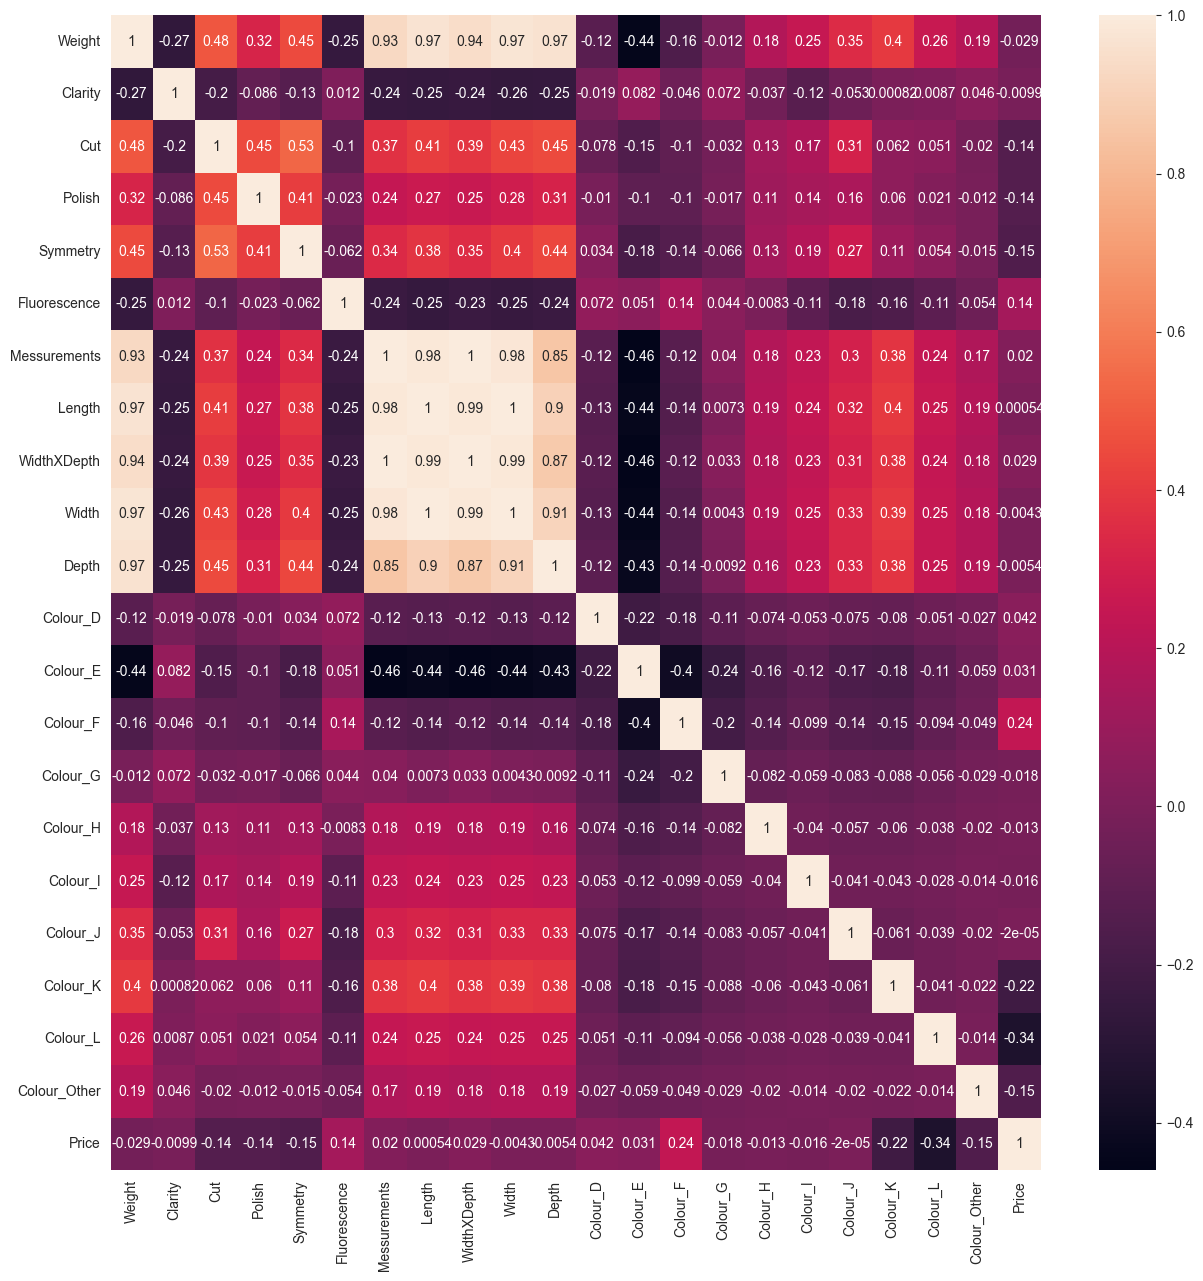

In [35]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.heatmap(data.corr(), annot=True,ax = ax)

#### Concepts
1. #### Correlation Coefficient (r):
    - ##### It is a measure of the linear relationship between two variables.
    - ##### It ranges from -1 to 1:
        - ##### 1: perfect positive correlation.
        - ##### -1: perfect negative correlation.
        - ##### 0: no correlation.

2. #### Colour Representation:
    - ##### Lighter colors (closer to white) show strong positive correlations.
    - ##### Darker colors (closer to black) indicate strong negative or no correlation.
    - ##### Intermediate shades of grey represent moderate correlations.

3. #### Diagonal Line:
    - ##### The diagonal shows each variable correlated with itself, so all values are 1.0. 

#### **Overall Observation:**
##### Price is mostly related with this columns<br>
1) ##### Cut
2) ##### Polish
3) ##### Symmetry
4) ##### Flourescene
5) ##### Colour
_______________________________________

#### Train Test Split </b>

In [36]:
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [37]:
print(f'Train Size: - {x_train.shape}\n\nTest Size: - {x_test.shape}')

Train Size: - (1571, 21)

Test Size: - (524, 21)


### <b> Model Development </b>

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import math

#### Function for Cacluating Metrics

In [39]:
# Creating Function to calculate Metrics

res = {'Model':[], 'R2 Score':[], 'MSE':[]}

def metricss(y_pred, model, name = '', ensemble = False):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    mae = np.round(metrics.mean_absolute_error(y_test, y_pred),2)
    mse = np.round(metrics.mean_squared_error(y_test, y_pred),2)
    r2 = np.round(metrics.r2_score(y_test, y_pred),2)
    rmse = np.round(math.sqrt(mse),2)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(model.score(x_train, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(model.score(x_test, y_test), 2)*100}%')

    print(f'\n**********Errors**********\n\n')
    print('Mean Absolute Error: - ',mae, '\n')
    print('Root-MSE: - ', rmse, '\n')
    print('Mean Squared Error: - ',mse, '\n\n')

    print(f'\n**********R2 Score**********\n')
    print('R2 Score: - ',r2*100, '\n\n')
    
    sns.distplot(y_pred, hist = False, label='predicted Price', ax = ax[0])
    sns.distplot(y_test, hist = False, label='Actual Price', ax = ax[0])
    ax[0].legend()

    if ensemble == True:
        
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])
    
    plt.tight_layout()

    res['Model'].append(name)
    res['R2 Score'].append(r2*100)
    res['MSE'].append(mse)



#### <b> Linear Regression </b>

#### **Key Terms** 

1. #### Linear Regression 

    - ##### It is a statistical method to estimate the relationship between one dependent variable that is Price and several independent variables that in this context are termed features.  

    - ##### This means that there is some direct proportionality existing between the predictors and the target variable. 

2. #### Overfitting and Underfitting

    - ##### Overfitting: A condition in which the testing results are far behind the training results. 

    - ##### Underfitting: In such cases, the model is so basic that it fails to learn the patterns even in the training model itself. 

3. #### Error Metrics

    - ##### MAE, MSE, and RMSE are issues that almost define any regression model as they help determine how better the prediction are in relation to the actual valued. 

    - ##### The goodness of fit is determined by the R² Score. The R² score is the higher the better the model. 


In [40]:
model_linearR = LinearRegression()
model_linearR.fit(x_train, y_train)

LinearRegression()

In [41]:
pred = model_linearR.predict(x_test)

**************************************************
Train Accuracy: - 52.0%
Test Accuracy: - 39.0%

**********Errors**********


Mean Absolute Error: -  24.03 

Root-MSE: -  34.48 

Mean Squared Error: -  1188.88 



**********R2 Score**********

R2 Score: -  39.0 




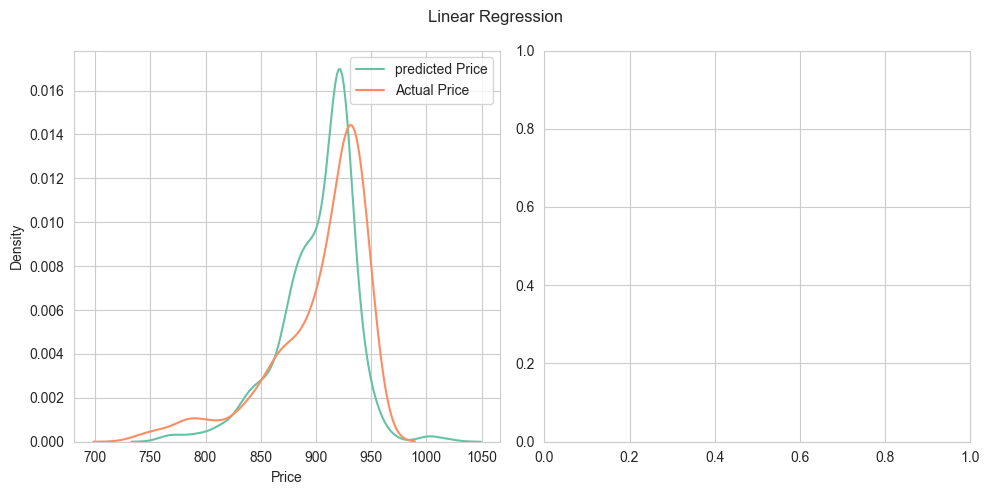

In [42]:
pred_linearR = metricss(pred, model_linearR, name = 'Linear Regression')

pred_linearR


#### **Graph: Density Plot** 
 
1. #### Purpose:  

    - ##### This graph helps analyze the actual Price curve, highlighted in orange, and the predicted Price curve, highlighted in green. 

    - ##### This graph illustrates the extent to which the predicted values are supported by the actual value.  

2. #### Observations: 

    - ##### The predicted and actual Price curves are slightly apart in shape.  

    - ##### In terms of the predicted curves, the peaks were a bit shifted from the actual which was also true in the model’s predicted curves.  

3. #### Concepts:  

    - ##### All forms of estimations tend in regression to have their two curves fit as closely as possible, which is the conception of this model.

    - ##### The differences in the density curves demonstrate the errors in predictions made by the model.

#### **Insights**

1. #### Model Limitations:

    - ##### The low R² score and moderate error metrics indicate that the model does not take into account the high variances of the data.

    - ##### The difference between train and test accuracy suggests that you might have overfit the model.

2. #### Next Steps:

    - ##### Try to add new features or modify the ones existing in the data (for instance, add polynomial terms).

    - ##### Look into non-linear models or more sophisticated techniques such as decision trees or other ensemble methods. 

3. #### Visualization Insights:

    - ##### The density plot sheds further light upon the apparent discrepancy between actual and predicted values. It also exposes some of the failings of the model.


#### <b> Decision Tree </b>

- ##### How it Works:

    - ##### Cuts the data into smaller pieces according to its feature values.

    - ##### For every cut, the model has to do a lot of work to try and maximize the information for that cut that is used to minimize error.

    - ##### Models interactions which are non-linear in nature in the data.

- ##### Pros:

    - ##### Uses non-linear data effectively.

    - ##### Reveals the important features.

- ##### Cons:

    - ##### Subject to overfitting though, particularly if the number of data points is small or pruning is not done.

In [43]:
max_depth = [5, 10, 50, 100, 150, 200,500, 1000]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'splitter':['best', 'random'],
                'max_features': ['sqrt', 'log2', 'auto'],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=grid_dt_para, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200, 500, 1000],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [44]:
model_dt = grid_df_CV.best_estimator_
model_dt

DecisionTreeRegressor(max_depth=500, max_features='log2', min_samples_leaf=5,
                      min_samples_split=10, splitter='random')

**************************************************
Train Accuracy: - 60.0%
Test Accuracy: - 42.0%

**********Errors**********


Mean Absolute Error: -  21.67 

Root-MSE: -  33.7 

Mean Squared Error: -  1135.56 



**********R2 Score**********

R2 Score: -  42.0 




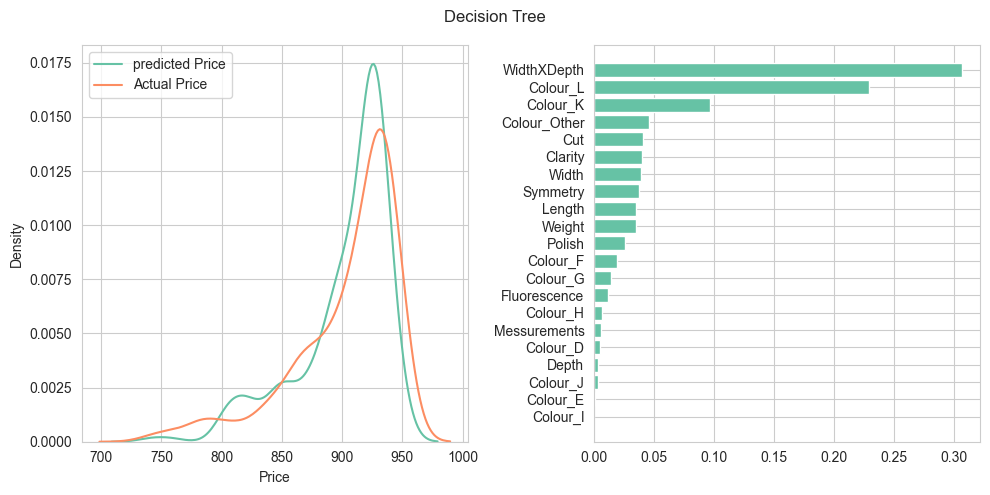

In [45]:
pred = model_dt.predict(x_test)
pred_dt = metricss(pred, model_dt, ensemble=True, name = 'Decision Tree')

1. #### **Density Plot (Left)**

    - ##### Purpose:

        - ##### To determine how closely the predicted price (green curve) matches the actual price (orange curve) by comparing the predicted and actual distributions.

        - ##### Indicates the intelligence of the model in predicting the target variable.

    - ##### Observations:

        - ##### Both the actual and predicted values show some degree of agreement in figure but certain areas, notably around 850-900 have some prediction inaccuracies.

        - ##### The predicted curve now peaks at a point where the regression curve was much better earlier as opposed to the regression manger model which is a slight improvement.

    - ##### Concepts:

        - ##### A model that would be called accurate would therefore be a model in which the actual and predicted density curves would overlap perfectly.
    
2. #### **Feature Importance Plot (Right)**

    - ##### Objective:

        - ##### Shows each of the features’ importance in making predictions.

        - ##### Increased values are those that the Decision Tree uses as the most important ones for the splits.

    - ##### Key Features:

        - ##### Width: The foremost critical feature which has the greatest contribution to the injection moulding.

        - ##### Measurements and Depth: They are also great contributors to the model.

        - ##### Colour_L and Clarity: This has low to modest importance.

        - ##### Other features (e.g. Symmetry, Fluorescence): These are of lower importance, hence impact very satisfied.
        
    - ##### Concepts:

        - ##### Feature importance indicates how many of the attributes in the Attribute Plane are the most significant ones in predicting Price. This helps in better Feature Engineering in subsequent models.



#### <b> Random Forest </b>

- ##### How it Works:

    - ##### Constructs a number of decision trees and for regression tasks takes the average of their outputs.

    - ##### Decreases the variance and the problem of overfitting as opposed to a sole decision tree.

- ##### Advantages:

    - ##### Takes care of non-linear forms effectively.

    - ##### The ensemble solution is also very robust against overfitting.

In [46]:
max_depth = [5, 10, 50, 100, 150, 200]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [1,2,5, 10, 50, 100]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'max_features': ['sqrt', 'log2', 'auto'],
                'min_samples_leaf':min_samples_leaf}

grid_rf_CV = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_rf_para, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [1, 2, 5, 10, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [47]:
model_rf = grid_rf_CV.best_estimator_
model_rf

RandomForestRegressor(max_depth=150, max_features='sqrt')

In [48]:
pred = model_rf.predict(x_test)

**************************************************
Train Accuracy: - 96.0%
Test Accuracy: - 71.0%

**********Errors**********


Mean Absolute Error: -  13.16 

Root-MSE: -  23.71 

Mean Squared Error: -  562.02 



**********R2 Score**********

R2 Score: -  71.0 




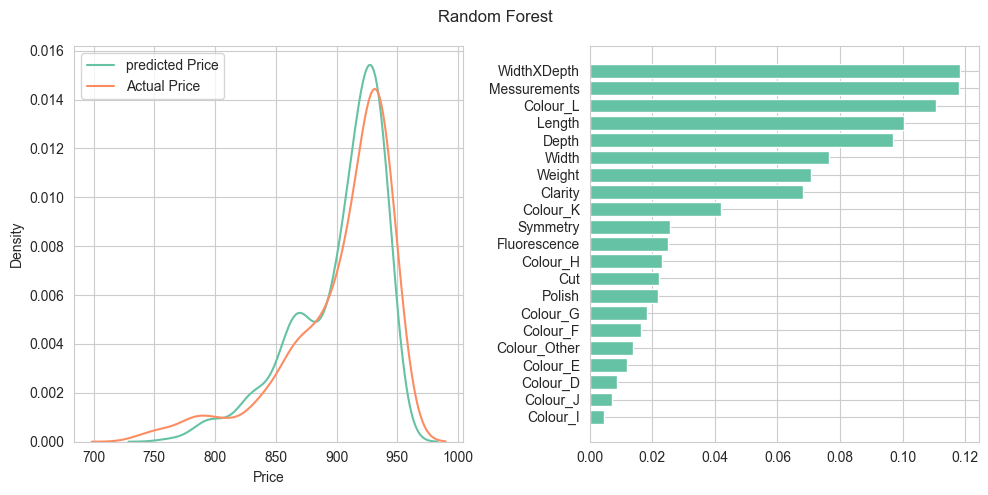

In [49]:
metricss(pred, model_rf, ensemble=True, name = 'Random Forest')

1. #### **Density Plot (Left)**

    - ##### Purpose:

        - ##### To compare the actual Price distribution (orange curve) with that predicted by the model (green curve).

        - ##### It shows the level of which the model classifies the predictor or target variable.

    - ##### Observations:

        - ##### The distribution of the actual average and the predicted average Price which the products will attain tend to envy each other, thus the model in question is in fact able to capture the distribution of the target variable in focus.

        - ##### The small differences illustrate forecasting errors that are normally pertinent in regression problems.

    - ##### Concepts:

        - ##### The more concentrated the Density plots are (in relation to Decision Tree or Linear regression for example) the more effective the method is and the better the ensemble approach works.

2. #### **Feature Importance Plot (Right)**
    - ##### Purpose:
        - ##### This shows how critical each feature is in relation of predicting. 
        - ##### Features with greater contribution Add even Greater Values to the model.

    - ##### Key Features:
        - ##### Measurements: In the order of importance measurement Colour_L and WidthXDepth comes second. 
        - ##### Length, Depth, and Width: These also add significant value to the predictions. 
        - ##### Features like Cut, Symmetry, and Fluorescence have lower importance. 
        - ##### Some Colour categories (e.g., Colour_L, Colour_K) compare favourably than others. 

    - ##### Concepts: 
        - ##### Random Forest determines feature importance by measuring the impact of each feature on functional value of all decision trees irrespective of any branches of the decision tree being active for a particular sample. 



#### <b> Best accuracy, R2 Score and MSE is given by Random Forest Model</b>

#### Making Final predicitons using Random Forest as it gave nice predictions

In [50]:
model_rf.fit(X, y)

RandomForestRegressor(max_depth=150, max_features='sqrt')

In [51]:
pred = model_rf.predict(X)

In [52]:
final = pd.DataFrame({'Id':id, 'Actual Price':data['Price'], 'Predicted Price':pred})

final.set_index('Id')

,Actual Price,Predicted Price
Id,,
1795561,655.38,714.3430
1789678,686.87,732.2581
1791701,692.93,730.9421
1799570,693.42,724.1383
1565775,703.36,723.8791
...,...,...
1773431,932.78,933.1364
1777250,932.78,932.4503
1710115,932.98,932.1933


#### **Insights and Next Steps** 
- ##### Model Performance: 
    - ##### Random Forest quite cuts it down because it is incomparable with past models, It reduces errors and generalisation comes out to be better.

- ##### Suggestion for improvement: 
    - ##### Try tuning the hyperparameters to reduce overfitting (e.g., maximum depth, number of trees). 

- ##### Feature Engineering: 
    - ##### Attention should be on features of most importance such as Measurements and Colour_L which may even necessitate the removal or even altering of features with lower significance.
---

### **Project Conclusion:**

#### **Key Insights:** 
- #### **EDA Observations:** 
    - ##### Some variables like dimensions and weight have weak or lack altogether correlation with price, which rather relies more on the categorical features for instance cut, clarity and color.
    - ##### High quality attributes like Excellent Cut, Excellent Polish, Excellent Symmetry overpopulate the dataset, this could be as a result of the preferences of the market or bias in the dataset. 
    - ##### Several Numerical, for instance, weight and dimensions had outliers which resulted in loss of consistency and reliability of the data set but after outliers were removed the data set gained both consistency and reliability. 

- #### **Data Processing:** 
    - ##### Categorical variables were turned into numbers using Label Encoding and One Hot Encoding. For instance, color was used with One-Hot Encoding because it is non-ordinal. 
    - ##### All the numerical features were made to have the same scale by using the Min-Max Scaling Approach. 

- #### **Machine Learning Models:** 
    - #### **Linear Regression:** 
        - ##### Train Accuracy: 52% 
        - ##### Test Accuracy: 39% 
        - ##### R² Score: 39% 
        - ##### A major challenge comprised in the weak performance was the lack of linear correlation between the features and the price. 
    
    - #### **Decision Tree:** 
        - ##### Train Accuracy: 73% 
        - ##### Test Accuracy: 39% 
        - ##### R² Score: 39% 
        - ##### Understandably, the approach was better in accuracy compared to the Linear Regression with a more complex structure of a decision tree, but experienced overfitting.
    
    - #### **Random Forest:**
        - ##### Train Accuracy: 96%
        - ##### Test Accuracy: 71%
        - ##### R² Score: 71%
        - ##### Best-performing model. The ensemble approach reduced overfitting and captured complex relationships effectively.

- #### **Feature Importance:**
    - ##### A focus on measurements, color and width were predictors within the Random Forest. Models included fluorescence and symmetry but were relatively unimportant to prediction.

- #### **Challenges:**

    - ##### The dataset displayed a strong bias towards high quality traits which may hinder application out of the sample.

    - ##### The weak relationships found between several numerical features and price indicate that more attributes or nonlinear transformations may be necessary.

- #### **Recommendations:**

    - ##### Bring in extra features on diamond pricing clouds like the market, the brand, as well as the certification standards.

    - ##### Better models like Gradient Boosting or Neural Network should be used in order to capture more complex relationships.

    - ##### The class imbalance in categorical features should be controlled to avoid biased predictions.

##### The project achieved the main goal of predicting the price of the diamond using machine learning approaches. Even though Random Forest was the best model performing on a test accuracy of 71%, the particular dataset problems and weak feature-price relationships stress that feature enrichment and enhancement of modeling approaches will help improve the results.



---